## TAREA 1 - 19000945

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


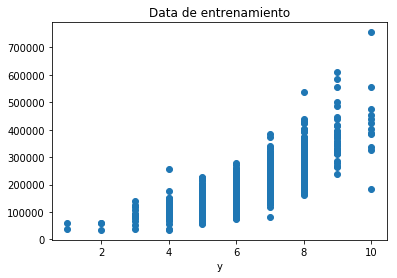

In [122]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
%load_ext tensorboard.notebook

# Cargar el dataset de entrenamiento
dataset = np.load('proyecto_training_data.npy') 

# Crear el dataset con el 80% de datos
dataset_size = np.size(dataset, 0)
dataset80 = dataset[0:int(dataset_size*0.8)]

# Variable X con mayor correlación OverallQual
x = dataset80[:,1]

# Valor de Y
y = dataset80[:,0]

# Cantidad de data en X
n = len(x)

# Graficar la data de entrenamiento
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Data de entrenamiento") 
plt.show()

# Definir gráficas
g = tf.Graph()

In [123]:
def training_function(lr = 0.01):
    with g.as_default():
        X = tf.placeholder("float") 
        Y = tf.placeholder("float")

        M = tf.Variable(0.0, name = "M") 
        b = tf.Variable(0.0, name = "b")

        learning_rate = lr
        training_epochs = 10000

        # Definición de Hipótesis
        with tf.name_scope("hipotesis"):
            y_hat = tf.add(tf.multiply(X, M), b) 

        # Función de costo mínimos cuadrados
        with tf.name_scope("minimoscuadrados"):
            cost = tf.reduce_mean(tf.pow(y_hat-Y, 2)) / (2 * n) 

        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

        # Inicializador de variables globales
        init = tf.global_variables_initializer()

        #with tf.Session() as sess:
        with tf.Session(graph=g) as sess:
            sess.run(init)

            
            for epoch in range(training_epochs):
                sess.run(optimizer, feed_dict = {X : x, Y : y})

                # Desplegar resultado cada 1500 epochs
                if (epoch + 1) % 1500 == 0:
                    c = sess.run(cost, feed_dict = {X : x, Y : y}) 
                    print("Epoch", (epoch + 1), ": Costo =", c, "- M =", sess.run(M), "- b =", sess.run(b))
                        
            writer = tf.summary.FileWriter('./graphs', g)
            writer.close()

            # Almacenar variables fuera de la sesión
            training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
            m_parameter = sess.run(M) 
            b_parameter = sess.run(b)

        print("Costo entrenamiento=", training_cost, "- Valor M =", m_parameter, "- Valor b =", b_parameter, '\n') 
    

## Grafo
<img src="grafo.PNG">

In [124]:
training_function(10)

Epoch 1500 : Costo = 1044825.9 - M = 36819.203 - b = -41439.145
Epoch 3000 : Costo = 1000579.8 - M = 40734.582 - b = -66514.21
Epoch 4500 : Costo = 987469.1 - M = 42865.895 - b = -80163.67
Epoch 6000 : Costo = 983584.56 - M = 44026.027 - b = -87593.48
Epoch 7500 : Costo = 982433.6 - M = 44657.543 - b = -91637.85
Epoch 9000 : Costo = 982092.06 - M = 45001.305 - b = -93839.38
Costo entrenamiento= 982012.5 - Valor M = 45138.184 - Valor b = -94715.99 



In [125]:
training_function(1)

Epoch 1500 : Costo = 1169851.5 - M = 30557.559 - b = -1338.057
Epoch 3000 : Costo = 1148335.6 - M = 31433.879 - b = -6950.267
Epoch 4500 : Costo = 1129283.0 - M = 32258.504 - b = -12231.382
Epoch 6000 : Costo = 1112411.6 - M = 33034.492 - b = -17200.926
Epoch 7500 : Costo = 1097473.4 - M = 33764.64 - b = -21877.21
Epoch 9000 : Costo = 1084244.9 - M = 34451.77 - b = -26277.62
Costo entrenamiento= 1076279.0 - Valor M = 34887.16 - Valor b = -29066.053 



In [126]:
training_function(0.1)

Epoch 1500 : Costo = 1192099.2 - M = 29551.059 - b = 3986.4846
Epoch 3000 : Costo = 1189051.6 - M = 29816.098 - b = 3403.8796
Epoch 4500 : Costo = 1186548.8 - M = 29911.447 - b = 2798.646
Epoch 6000 : Costo = 1184076.9 - M = 30005.312 - b = 2197.0564
Epoch 7500 : Costo = 1181633.2 - M = 30099.062 - b = 1599.0206
Epoch 9000 : Costo = 1179219.2 - M = 30191.85 - b = 1004.4336
Costo entrenamiento= 1177626.2 - Valor M = 30253.35 - Valor b = 610.0931 



In [127]:
training_function(0.01)

Epoch 1500 : Costo = 6703387.0 - M = 11929.174 - b = 1799.7446
Epoch 3000 : Costo = 3161668.2 - M = 19062.736 - b = 2850.7104
Epoch 4500 : Costo = 1896375.5 - M = 23330.088 - b = 3454.1667
Epoch 6000 : Costo = 1444235.6 - M = 25884.416 - b = 3790.1777
Epoch 7500 : Costo = 1282563.5 - M = 27414.91 - b = 3966.3577
Epoch 9000 : Costo = 1224648.9 - M = 28333.475 - b = 4047.0242
Costo entrenamiento= 1208568.2 - Valor M = 28732.066 - Valor b = 4067.4443 



In [128]:
training_function(0.001)

Epoch 1500 : Costo = 15109320.0 - M = 1487.0751 - b = 225.90436
Epoch 3000 : Costo = 13748282.0 - M = 2899.6045 - b = 440.16916
Epoch 4500 : Costo = 12520356.0 - M = 4241.3257 - b = 643.3776
Epoch 6000 : Costo = 11412532.0 - M = 5515.794 - b = 836.085
Epoch 7500 : Costo = 10413058.0 - M = 6726.3784 - b = 1018.8182
Epoch 9000 : Costo = 9511338.0 - M = 7876.2827 - b = 1192.077
Costo entrenamiento= 8959739.0 - Valor M = 8610.688 - Valor b = 1302.5549 



In [129]:
training_function(0.0001)

Epoch 1500 : Costo = 16459971.0 - M = 152.17036 - b = 23.131138
Epoch 3000 : Costo = 16303653.0 - M = 303.56024 - b = 46.14038
Epoch 4500 : Costo = 16148929.0 - M = 454.17334 - b = 69.0284
Epoch 6000 : Costo = 15995797.0 - M = 604.0142 - b = 91.795715
Epoch 7500 : Costo = 15844229.0 - M = 753.08496 - b = 114.44307
Epoch 9000 : Costo = 15694208.0 - M = 901.39246 - b = 136.97119
Costo entrenamiento= 15595053.0 - Valor M = 999.84094 - Valor b = 151.92361 



### Como conclusión podemos observar como el hiperparámetro del LR tiene una gran influencia en la rapidez con que converge la función de entrenamiento. En este caso, el LR de 10 aproximó de mejor forma para los parámetros M y b.

### El lr ayuda a definir la longitud de los pasos con los que la función se acerca al mínimo cuadrado, si definimos un valor muy grande, puede que nunca logremos llegar a ese mínimo. Por otro lado, si definimos un LR demasiado bajo, se pueden necesitar muchos epochs para alcanzar el objetivo.